In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
data=pd.read_csv("/content/mobile_price_classification (1).csv")

In [4]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape

(2000, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
train_data_f =data[data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

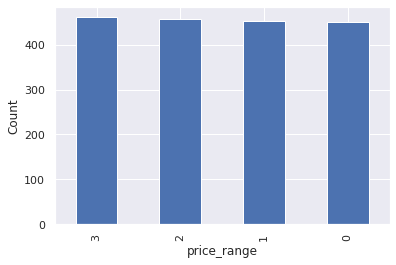

In [7]:
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

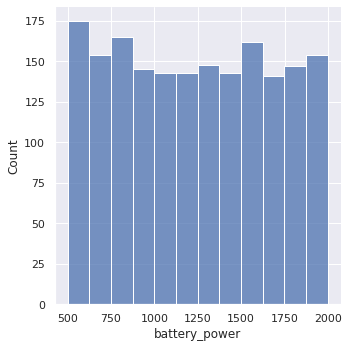

In [8]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()

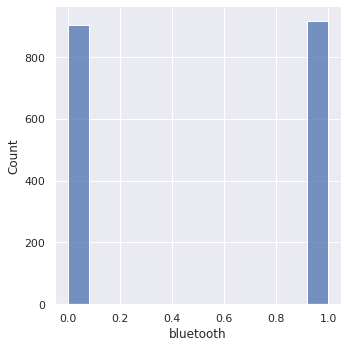

In [9]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["bluetooth"])
plt.show()

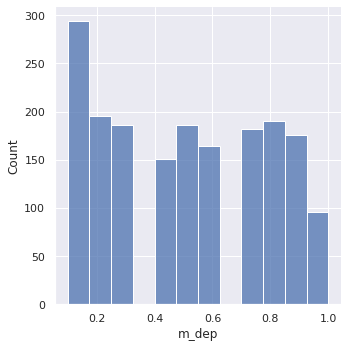

In [11]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()

In [40]:
print(train_data_f.head())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


   battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  int_memory  \
0            842          0          2.2         0          1   0           7   
1           1021          1          0.5         1          0   1          53   
2            563          1          0.5         1          2   1          41   
3            615          1          2.5         0          0   0          10   
4           1821          1          1.2         0         13   1          44   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0    0.6        188        2  ...         20       756  2549     9     7   
1    0.7        136        3  ...        905      1988  2631    17     3   
2    0.9        145        5  ...       1263      1716  2603    11     2   
3    0.8        131        6  ...       1216      1786  2769    16     8   
4    0.6        141        2  ...       1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  

In [12]:
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
#missing values
X.isna().any()

battery_power     False
bluetooth         False
clock_speed       False
dual_sim          False
front_cam         False
4G                False
int_memory        False
m_dep             False
mobile_wt         False
n_cores           False
primary_camera    False
px_height         False
px_width          False
ram               False
sc_h              False
sc_w              False
talk_time         False
three_g           False
touch_screen      False
wifi              False
dtype: bool

In [43]:
train_data_f = scaler.fit_transform(train_data_f)

In [44]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
from tensorflow. keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [47]:
model = Sequential()
model.add(Dense(20,activation='relu'))

model.add(Dense(4,activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train,validation_data=(X_valid, y_valid),  epochs=10)

Epoch 1/10
46/46 [==============================] - 1s 7ms/step - loss: 327.2685 - accuracy: 0.3407 - val_loss: 171.1083 - val_accuracy: 0.3956
Epoch 2/10
46/46 [==============================] - 0s 2ms/step - loss: 104.7937 - accuracy: 0.3736 - val_loss: 56.1673 - val_accuracy: 0.4341
Epoch 3/10
46/46 [==============================] - 0s 2ms/step - loss: 52.3517 - accuracy: 0.4004 - val_loss: 37.3807 - val_accuracy: 0.4451
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 36.8623 - accuracy: 0.4018 - val_loss: 30.4442 - val_accuracy: 0.4670
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 27.4696 - accuracy: 0.4313 - val_loss: 22.4837 - val_accuracy: 0.4670
Epoch 6/10
46/46 [==============================] - 0s 3ms/step - loss: 19.8574 - accuracy: 0.4485 - val_loss: 15.0470 - val_accuracy: 0.5165
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 13.7690 - accuracy: 0.5027 - val_loss: 11.3994 - val_accuracy: 0.5247
Epo

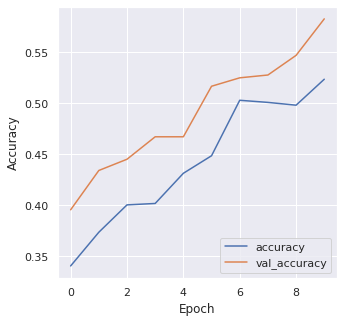

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')